In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import sweetviz as sv
import seaborn as sns

pd.set_option('display.max_colwidth', None)

In [3]:
data_path = '../../data/emotion-emotion_69k.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju...",NaN,NaN
1,1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?,NaN,NaN
2,2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...,NaN,NaN
3,3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.,NaN,NaN
4,4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN


In [4]:
df = df[['Situation', 'emotion', 'empathetic_dialogues', 'labels']]
df.head()

,Situation,emotion,empathetic_dialogues,labels
0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju..."
1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?
2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...
3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.
4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.


In [5]:
df['empathetic_dialogues'] = df['empathetic_dialogues'].str.replace(r'^Customer :|Agent :$', '', regex=True).str.strip()
df.dropna(inplace=True)
df.head(10)

,Situation,emotion,empathetic_dialogues,labels
0,I remember going to the fireworks with my best...,sentimental,I remember going to see the fireworks with my ...,"Was this a friend you were in love with, or ju..."
1,I remember going to the fireworks with my best...,sentimental,This was a best friend. I miss her.,Where has she gone?
2,I remember going to the fireworks with my best...,sentimental,We no longer talk.,Oh was this something that happened because of...
3,I remember going to the fireworks with my best...,sentimental,"Was this a friend you were in love with, or ju...",This was a best friend. I miss her.
4,I remember going to the fireworks with my best...,sentimental,Where has she gone?,We no longer talk.
5,i used to scare for darkness,afraid,it feels like hitting to blank wall when i see...,Oh ya? I don't really see how
6,i used to scare for darkness,afraid,dont you feel so.. its a wonder,I do actually hit blank walls a lot of times b...
7,i used to scare for darkness,afraid,i virtually thought so.. and i used to get swe...,Wait what are sweatings
8,i used to scare for darkness,afraid,Oh ya? I don't really see how,dont you feel so.. its a wonder
9,i used to scare for darkness,afraid,I do actually hit blank walls a lot of times b...,i virtually thought so.. and i used to get sw...


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



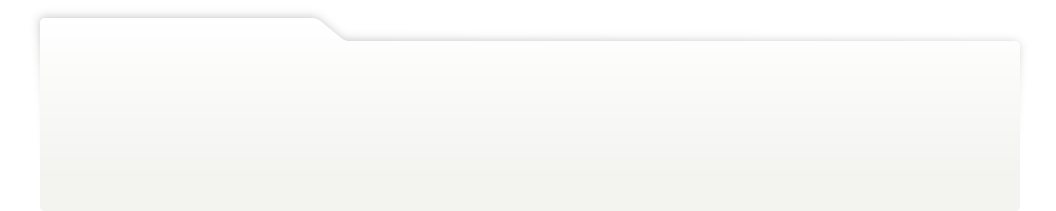
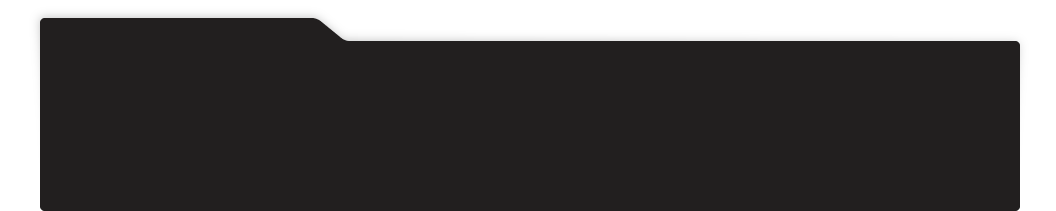
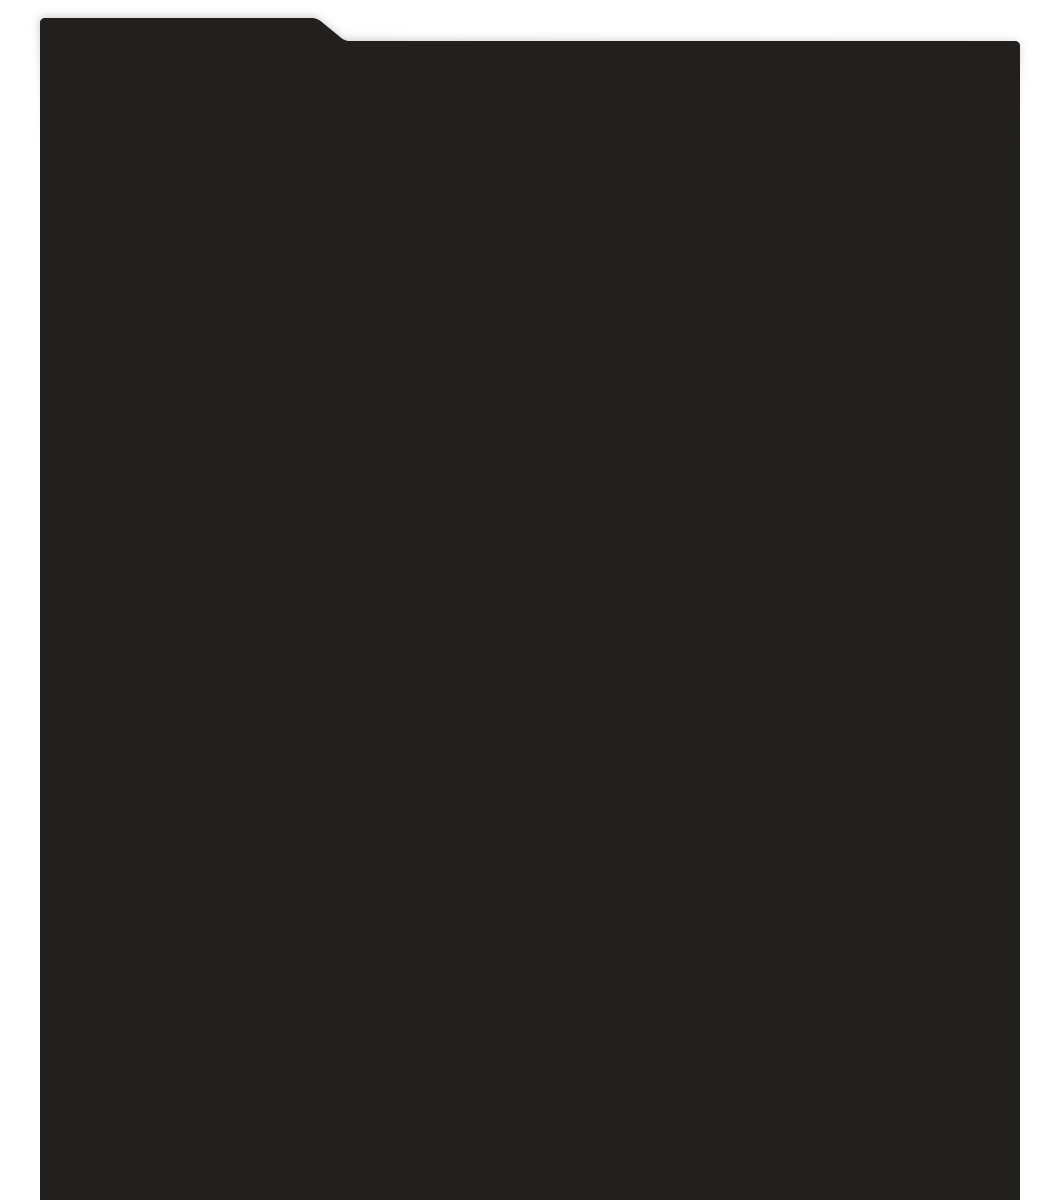
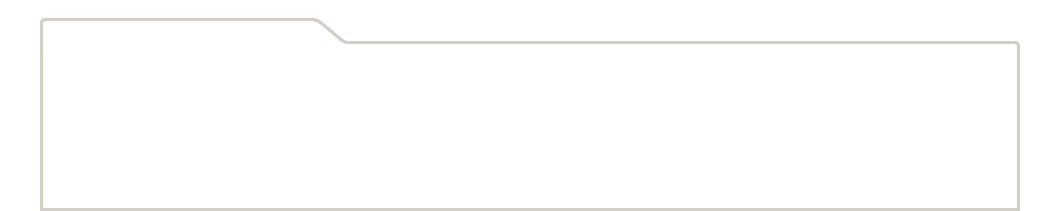
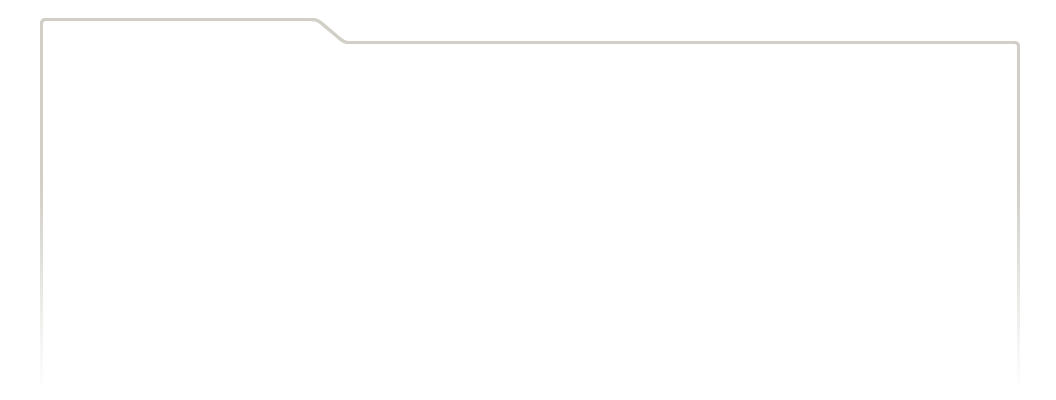
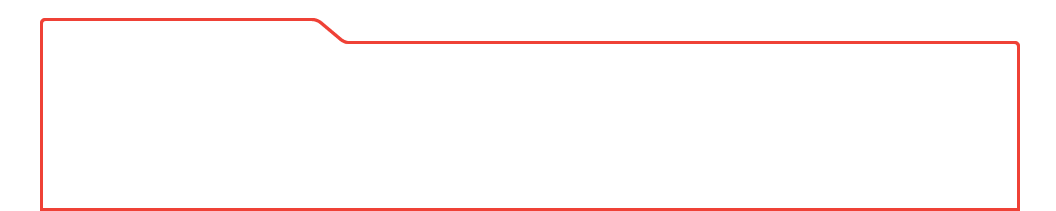
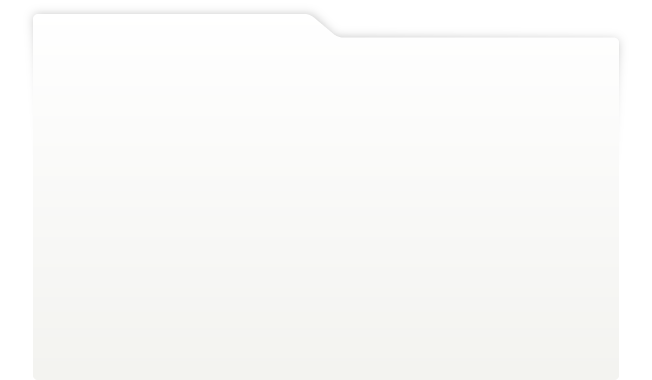
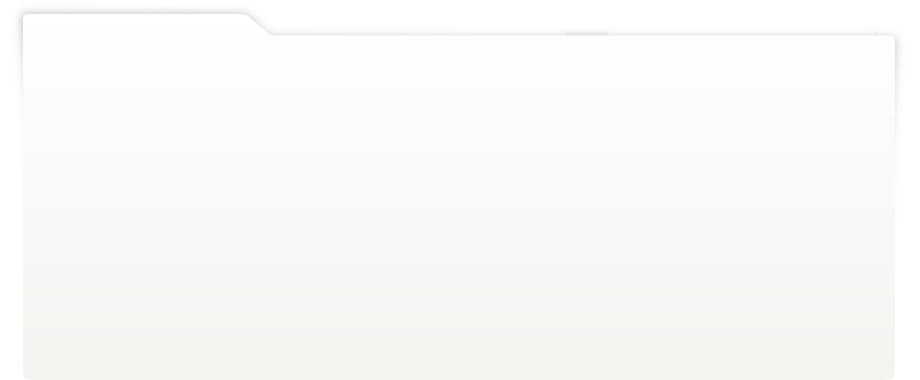
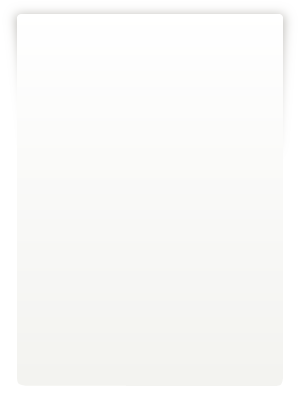
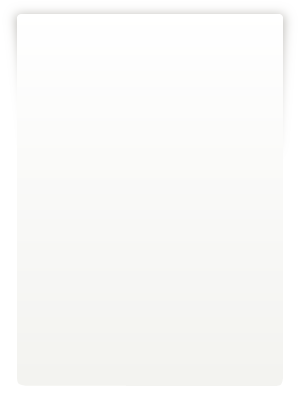
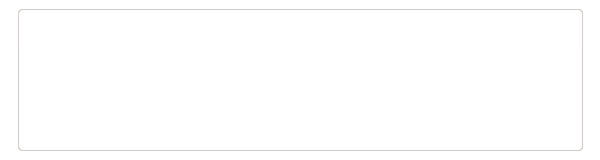
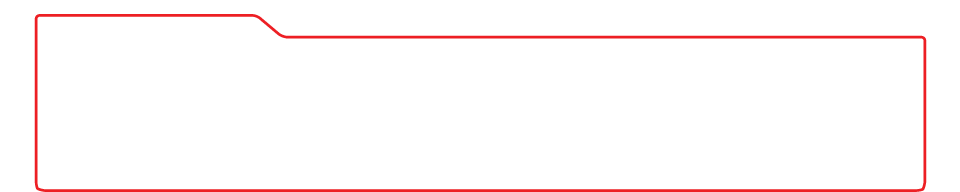
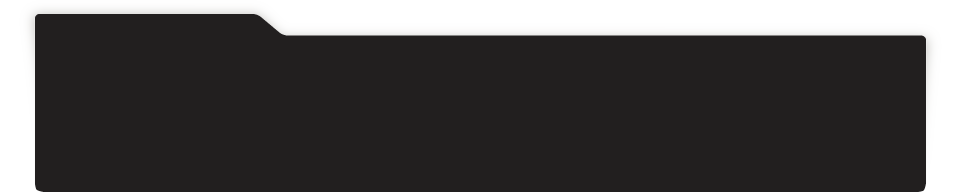
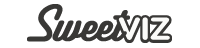
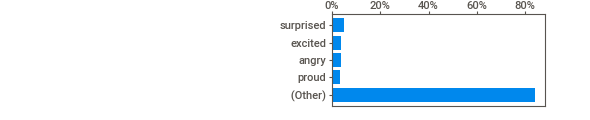
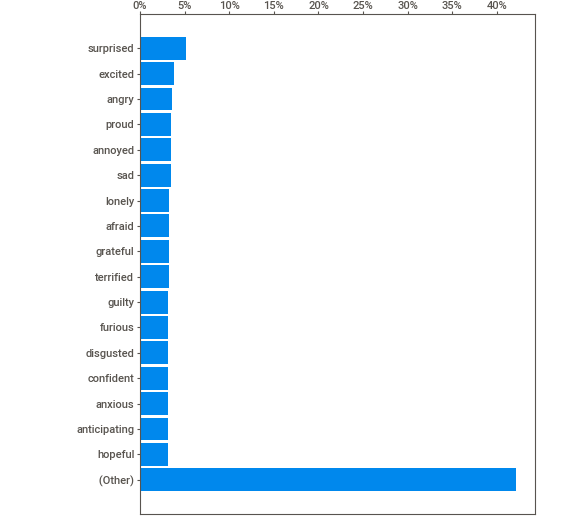
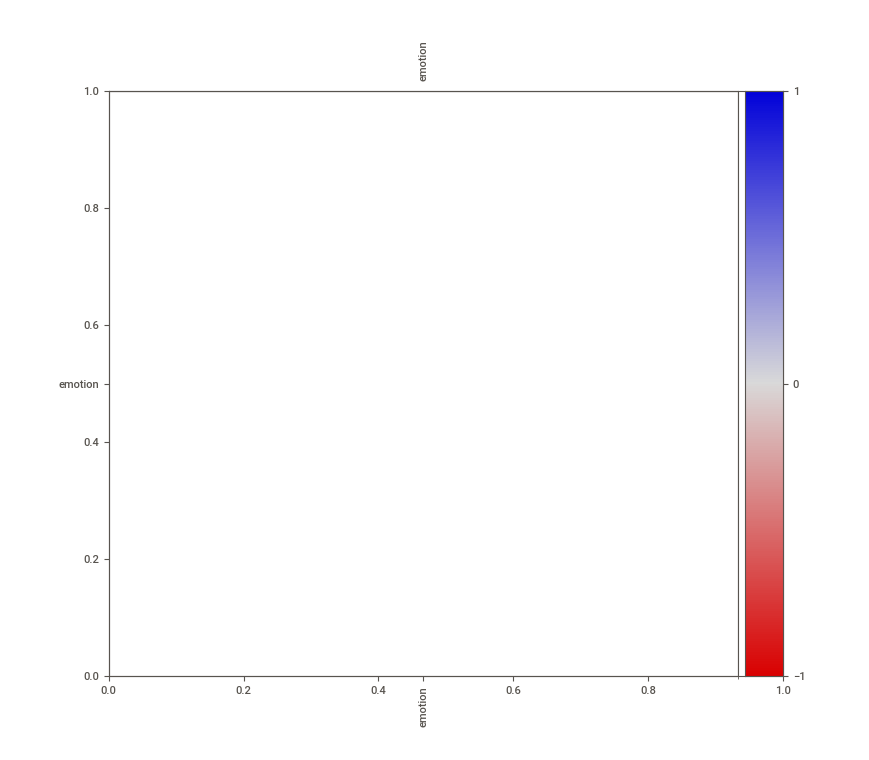
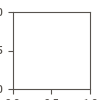

In [6]:
report = sv.analyze(df)
report.show_notebook()

### Yanxi's work for labeling emotions

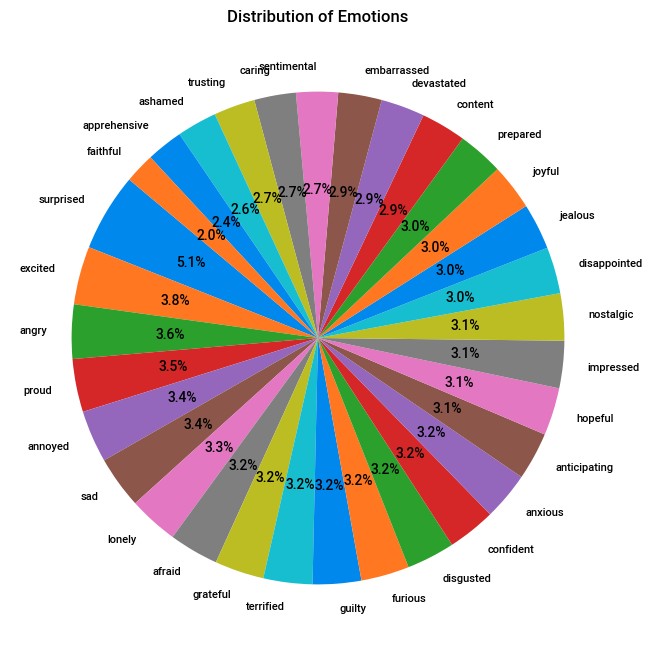

In [7]:
emotion_counts = df['emotion'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.show()

In [8]:
# Mapping emotions to their groups
emotion_mapping = {
    'surprised': 'excited',
    'joyful': 'excited',
    'terrified': 'afraid',
    'anxious': 'afraid',
    'apprehensive': 'afraid',
    'disgusted': 'disgusted',
    'embarrassed': 'disgusted',
    'guilty': 'disgusted',
    'ashamed': 'disgusted',
    'angry': 'annoyed',
    'annoyed': 'annoyed',
    'jealous': 'annoyed',
    'furious': 'annoyed',
    'faithful': 'grateful',
    'trusting': 'grateful',
    'grateful': 'grateful',
    'caring': 'grateful',
    'hopeful': 'grateful',
    'sad': 'disappointed',
    'disappointed': 'disappointed',
    'devastated': 'disappointed',
    'lonely': 'disappointed',
    'nostalgic': 'disappointed',
    'sentimental': 'disappointed',
    'proud': 'impressed',
    'impressed': 'impressed',
    'content': 'impressed',
    'anticipating': 'prepared',
    'prepared': 'prepared',
    'confident': 'prepared'
}
emotions = {}
df['grouped_emotion'] = df['emotion'].map(emotion_mapping)

In [30]:
len(grouped_emotion)

NameError: name 'grouped_emotion' is not defined

In [9]:
group_counts = df['grouped_emotion'].value_counts()
print(group_counts)
print("total counts:", df['grouped_emotion'].shape[0])
df.dropna(inplace=True)

grouped_emotion
disappointed    11913
grateful         8913
annoyed          8509
disgusted        7635
impressed        6154
prepared         6000
afraid           5660
excited          5251
Name: count, dtype: int64
total counts: 64594


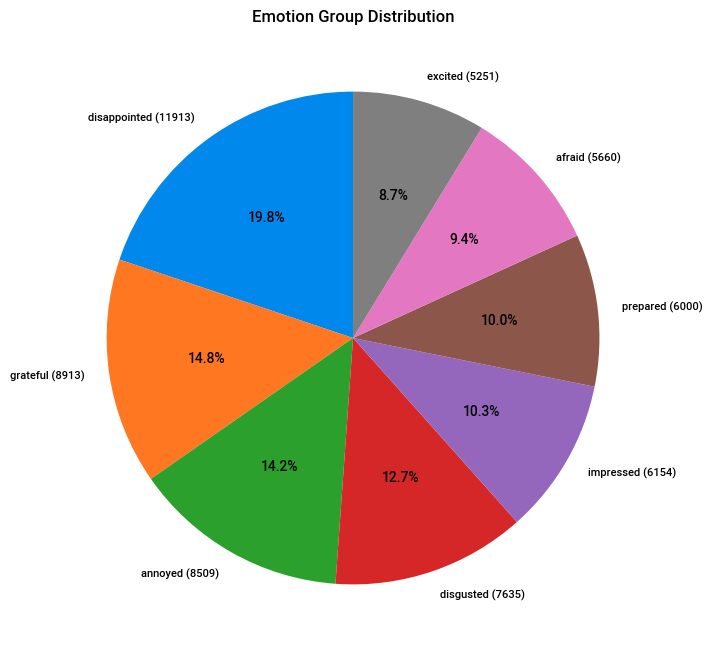

In [10]:
plt.figure(figsize=(8, 8))
group_counts.plot(kind='pie',labels=[f'{label} ({count})' for label, count in zip(group_counts.index, group_counts)], autopct='%1.1f%%', startangle=90)
plt.title('Emotion Group Distribution')
plt.ylabel('')  # Hide the y-axis label (unnecessary for pie chart)
plt.show()

### Simple data cleansing

In [11]:
df = df[['Situation', 'grouped_emotion', 'empathetic_dialogues', 'labels']]

In [12]:
for column in df.columns:
    min_length_row = df[column].str.len().idxmin() 
    print(f"Column '{column}' - Shortest entry: '{df[column][min_length_row]}'")

Column 'Situation' - Shortest entry: '1'
Column 'grouped_emotion' - Shortest entry: 'afraid'
Column 'empathetic_dialogues' - Shortest entry: '3'
Column 'labels' - Shortest entry: '4'


⭡ there are non proper elements like only number, so let's filter them out if they are less than 3 characters.

In [13]:
columns_to_check = ['Situation','grouped_emotion', 'empathetic_dialogues', 'labels']
mask = ~df.apply(lambda x: x.str.len() < 3).any(axis=1)
df = df[mask]

for column in df.columns:
    min_length_row = df[column].str.len().idxmin() 
    print(f"Column '{column}' - Shortest entry: '{df[column][min_length_row]}'")

Column 'Situation' - Shortest entry: 'Lies'
Column 'grouped_emotion' - Shortest entry: 'afraid'
Column 'empathetic_dialogues' - Shortest entry: 'Yes'
Column 'labels' - Shortest entry: 'Yes'


### EDA report again

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



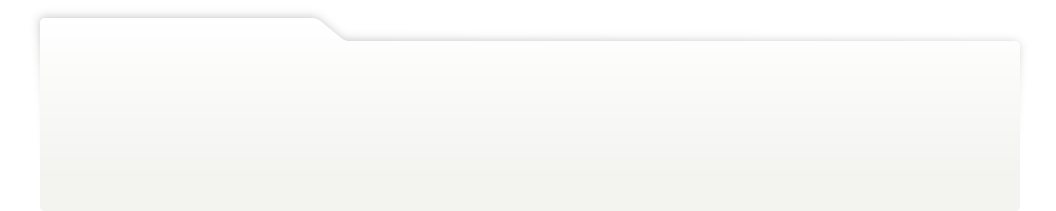
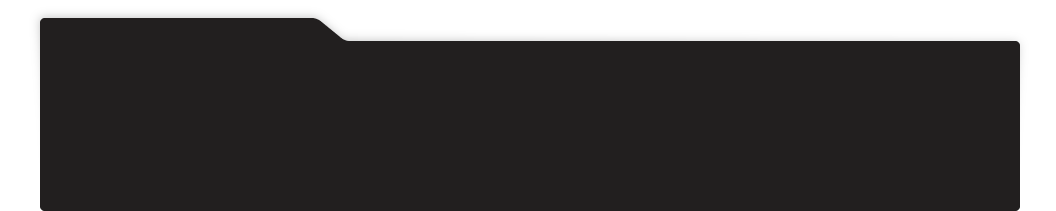
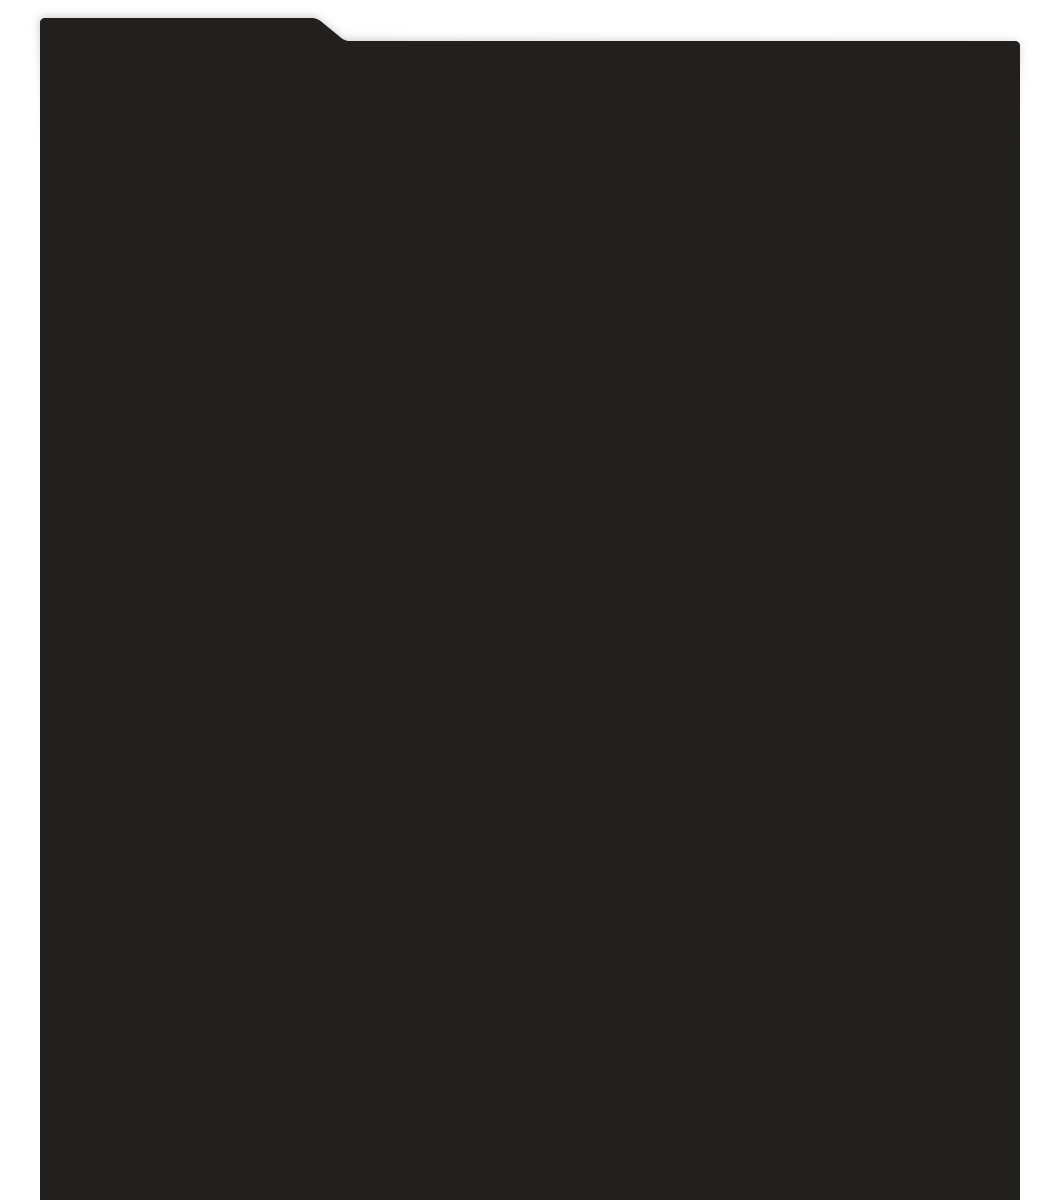
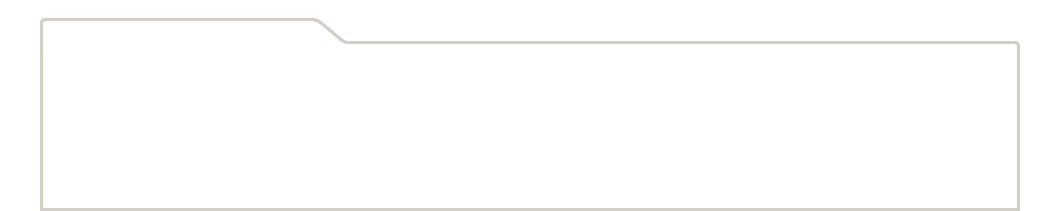
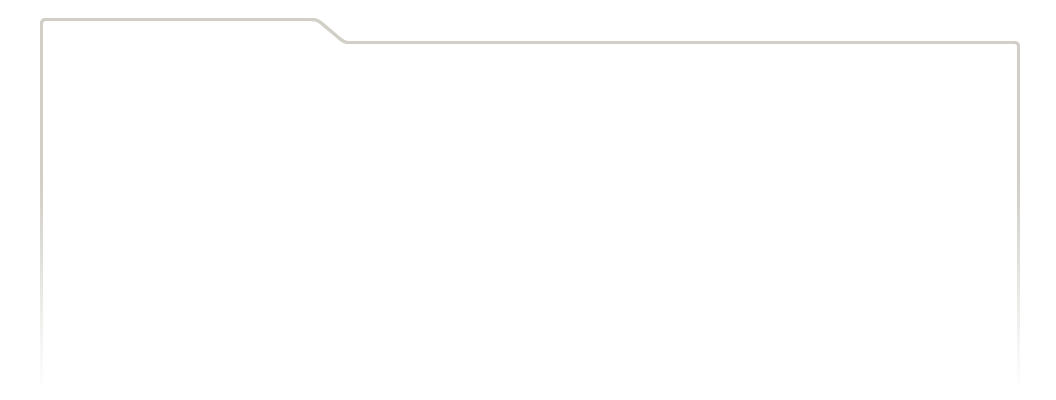
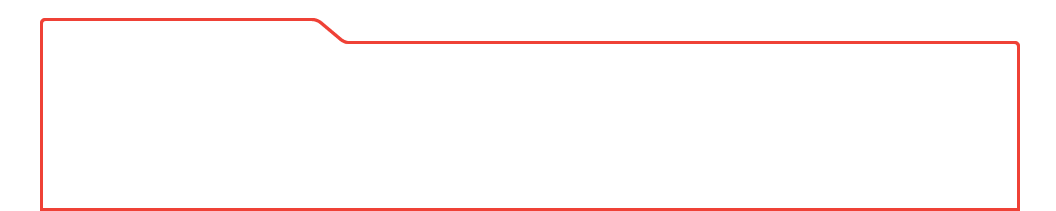
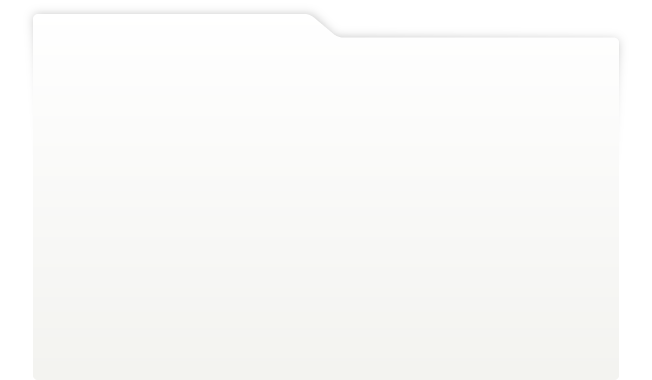
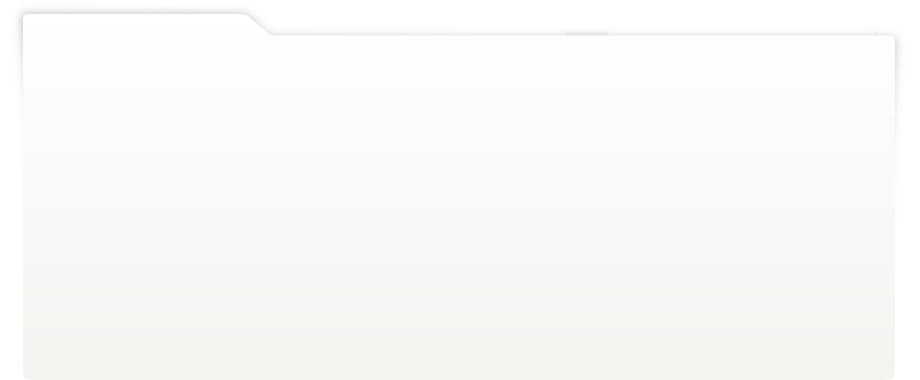
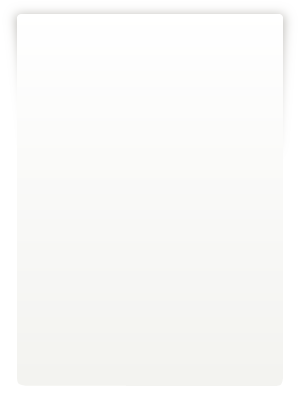
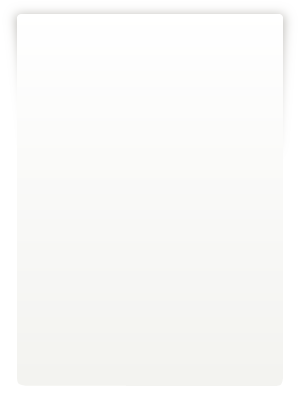
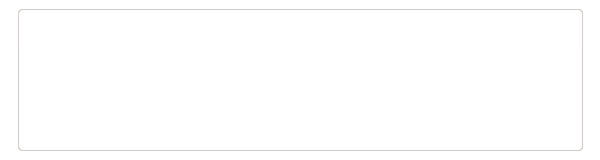
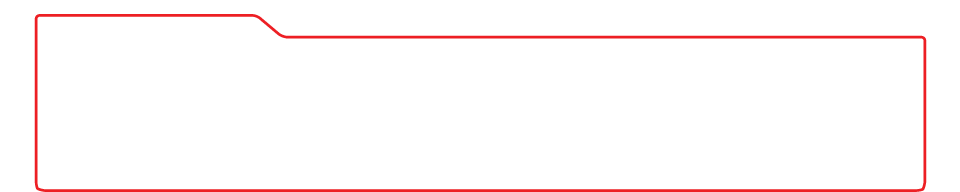
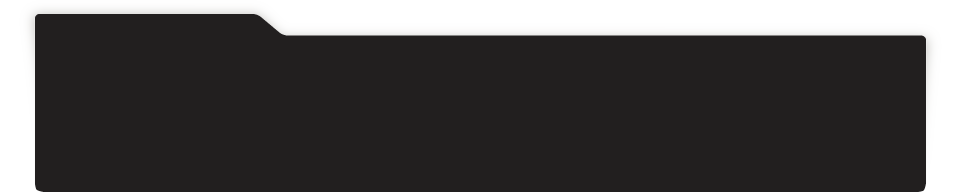
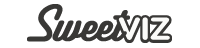
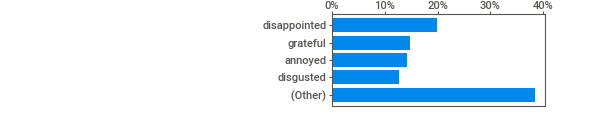
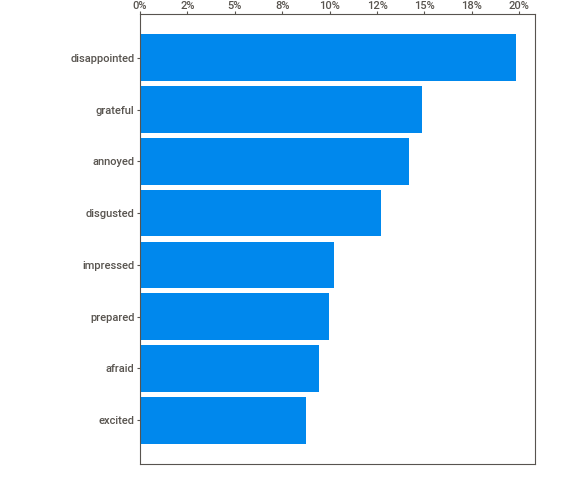
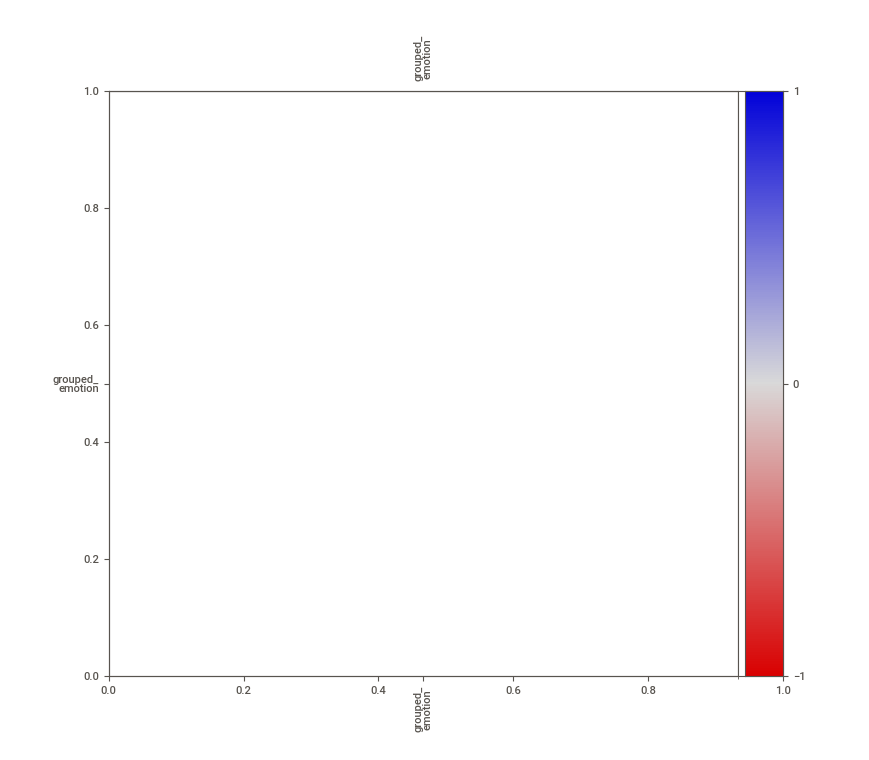
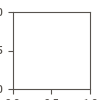

In [14]:
report = sv.analyze(df)
report.show_notebook()

### Visualization of length of sentences

#### 1. input: empathetic_dialogues

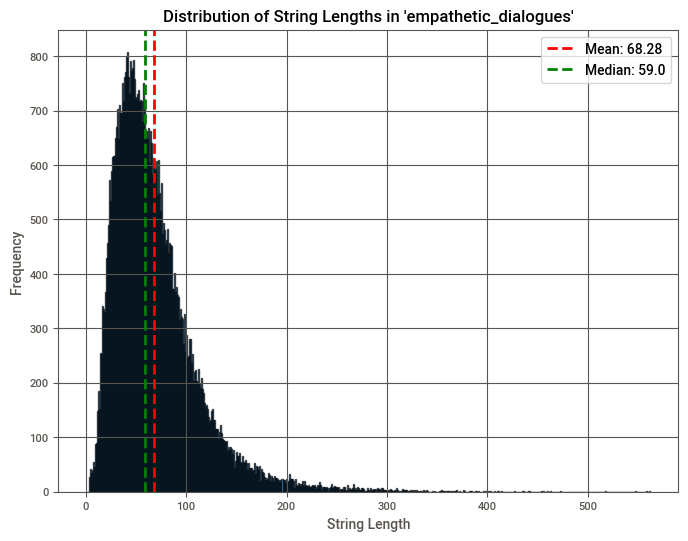

In [15]:
df['len_ed'] = df['empathetic_dialogues'].str.len()

mean_length = df['len_ed'].mean()
median_length = df['len_ed'].median()

plt.figure(figsize=(8, 6))
plt.hist(df['len_ed'], bins=range(1, df['len_ed'].max() + 2), edgecolor='black', alpha=0.7)

plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.title("Distribution of String Lengths in 'empathetic_dialogues'")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

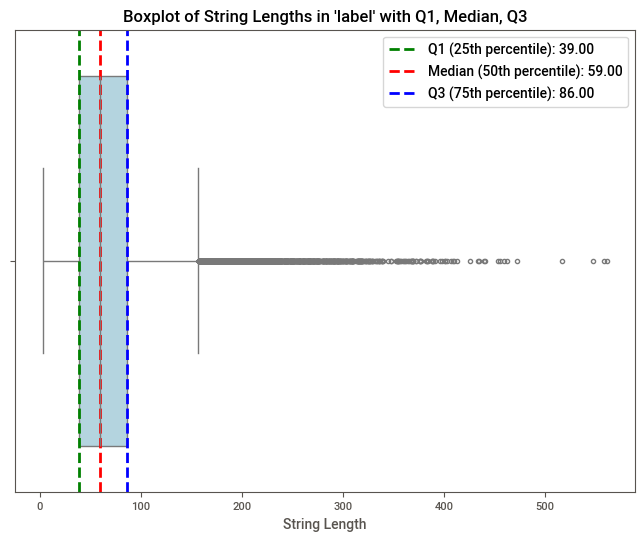

In [16]:
Q1 = df['len_ed'].quantile(0.25)
Q2 = df['len_ed'].quantile(0.50) 
Q3 = df['len_ed'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['len_ed'], color='lightblue')

plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

plt.title("Boxplot of String Lengths in 'label' with Q1, Median, Q3")
plt.xlabel("String Length")

plt.legend()
plt.show()

#### 2. output: labels

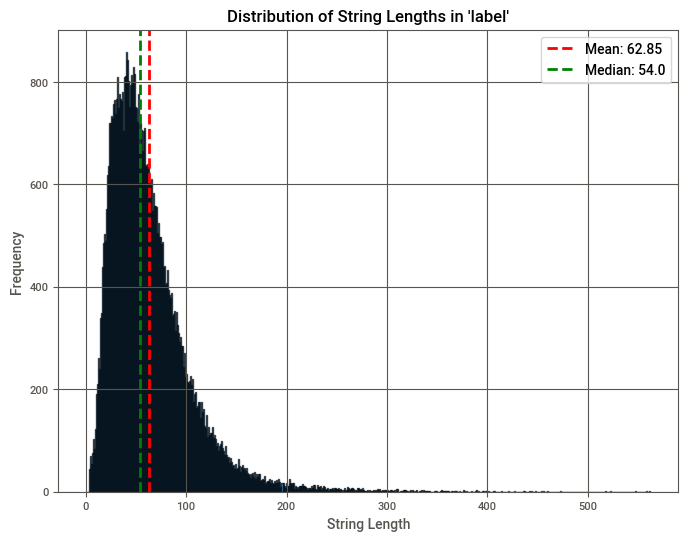

In [17]:
df['len_labels'] = df['labels'].str.len()

mean_length = df['len_labels'].mean()
median_length = df['len_labels'].median()

plt.figure(figsize=(8, 6))
plt.hist(df['len_labels'], bins=range(1, df['len_labels'].max() + 2), edgecolor='black', alpha=0.7)

plt.axvline(mean_length, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_length:.2f}')
plt.axvline(median_length, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_length}')

plt.title("Distribution of String Lengths in 'label'")
plt.xlabel("String Length")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

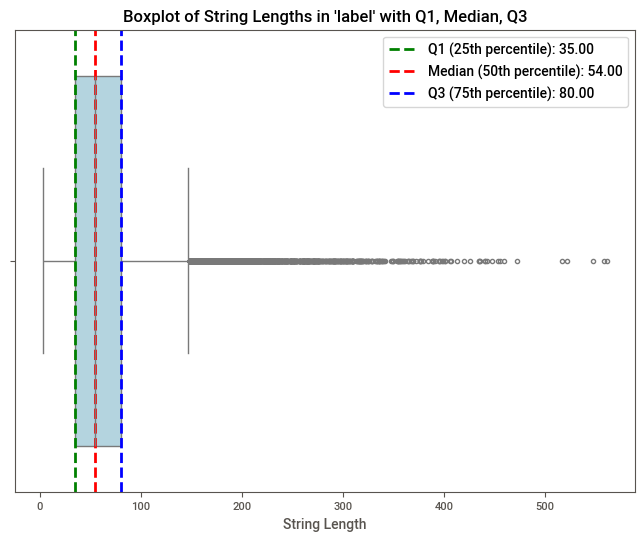

In [18]:
Q1 = df['len_labels'].quantile(0.25)
Q2 = df['len_labels'].quantile(0.50) 
Q3 = df['len_labels'].quantile(0.75)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['len_labels'], color='lightblue')

plt.axvline(Q1, color='g', linestyle='dashed', linewidth=2, label=f'Q1 (25th percentile): {Q1:.2f}')
plt.axvline(Q2, color='r', linestyle='dashed', linewidth=2, label=f'Median (50th percentile): {Q2:.2f}')
plt.axvline(Q3, color='b', linestyle='dashed', linewidth=2, label=f'Q3 (75th percentile): {Q3:.2f}')

plt.title("Boxplot of String Lengths in 'label' with Q1, Median, Q3")
plt.xlabel("String Length")

plt.legend()
plt.show()

### Sentence analysis
+ Variety of the dataset is important
+ Compare similarity of the sentence/word use available API

+ 1. Delete repeated sentencess
I noticed that the data was repeating itself, with the customer and agent switching each other

In [23]:
df.head(10)

,Situation,grouped_emotion,empathetic_dialogues,labels,len_ed,len_labels
0,I remember going to the fireworks with my best...,disappointed,I remember going to see the fireworks with my ...,"Was this a friend you were in love with, or ju...",194,63
1,I remember going to the fireworks with my best...,disappointed,This was a best friend. I miss her.,Where has she gone?,35,19
2,I remember going to the fireworks with my best...,disappointed,We no longer talk.,Oh was this something that happened because of...,18,59
3,I remember going to the fireworks with my best...,disappointed,"Was this a friend you were in love with, or ju...",This was a best friend. I miss her.,63,35
4,I remember going to the fireworks with my best...,disappointed,Where has she gone?,We no longer talk.,19,18
10,I showed a guy how to run a good bead in weldi...,impressed,Hi how are you doing today,doing good.. how about you,26,26
11,I showed a guy how to run a good bead in weldi...,impressed,"Im good, trying to understand how someone can ...",it's quite strange that you didnt imagine it,103,44
12,I showed a guy how to run a good bead in weldi...,impressed,doing good.. how about you,"Im good, trying to understand how someone can ...",26,103
13,I showed a guy how to run a good bead in weldi...,impressed,it's quite strange that you didnt imagine it,"i dont imagine feeling a lot, maybe your on to...",44,56
14,I have always been loyal to my wife.,grateful,I have never cheated on my wife.,"And thats something you should never do, good ...",32,54


In [26]:
print(df[['empathetic_dialogues', 'labels']][0:5])

                                                                                                                                                                                 empathetic_dialogues  \
0  I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.   
1                                                                                                                                                                 This was a best friend. I miss her.   
2                                                                                                                                                                                  We no longer talk.   
3                                                                                                                                     Was this a friend you were in love with, or just a best friend

In [21]:
df.tail(10)

,Situation,grouped_emotion,empathetic_dialogues,labels,len_ed,len_labels
64585,I am waiting to see if I pass my graduate exam...,prepared,I am waiting to see if I pass the GRE.,I hope you did it. Don't worry too much.,38,40
64586,I am waiting to see if I pass my graduate exam...,prepared,"Thank you, I am trying my best.",If you need to you can always take it again. G...,31,55
64587,I am waiting to see if I pass my graduate exam...,prepared,I hope you did it. Don't worry too much.,"Thank you, I am trying my best.",40,32
64591,I found some pictures of my grandma in the att...,disappointed,I was going through the stuff in my attic last...,Did you find anything great?,52,28
64592,I found some pictures of my grandma in the att...,disappointed,Yeah I found some old pictures of when us kids...,What a wonderful memory.,88,26
64593,I found some pictures of my grandma in the att...,disappointed,Did you find anything great?,Yeah I found some old pictures of when us kids...,28,88
64594,I found some pictures of my grandma in the att...,disappointed,What a wonderful memory.,Yeah reminds me of the good old days. I miss ...,24,95
64595,I woke up this morning to my wife telling me s...,excited,I woke up this morning to my wife telling me s...,Oh hey that's awesome! That is awesome right?,60,46
64596,I woke up this morning to my wife telling me s...,excited,It is soooo awesome. We have been wanting a b...,That is awesome!!!! Congratulations!,116,36
64597,I woke up this morning to my wife telling me s...,excited,Oh hey that's awesome! That is awesome right?,It is soooo awesome. We have been wanting a b...,46,116


In [31]:
len(df)

59835

In [40]:
index_to_delete = []

for index, row in df.iterrows():
    if row['empathetic_dialogues'] in df['labels'][:index].values:
        index_to_delete.append(index)

duplicates = df.loc[index_to_delete]
duplicates_sorted = duplicates.sort_index()
duplicates

,Situation,grouped_emotion,empathetic_dialogues,labels,len_ed,len_labels
3,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,"Was this a friend you were in love with, or just a best friend?",This was a best friend. I miss her.,63,35
4,"I remember going to the fireworks with my best friend. There was a lot of people, but it only felt like us in the world.",disappointed,Where has she gone?,We no longer talk.,19,18
11,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,"Im good, trying to understand how someone can feel like hitting a blank wall when they see the darkness",it's quite strange that you didnt imagine it,103,44
12,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,doing good.. how about you,"Im good, trying to understand how someone can feel like hitting a blank wall when they see the darkness",26,103
13,I showed a guy how to run a good bead in welding class and he caught on quick.,impressed,it's quite strange that you didnt imagine it,"i dont imagine feeling a lot, maybe your on to something",44,56
...,...,...,...,...,...,...
64587,I am waiting to see if I pass my graduate exam and I am feeling this way.,prepared,I hope you did it. Don't worry too much.,"Thank you, I am trying my best.",40,32
64592,I found some pictures of my grandma in the attic last night,disappointed,Yeah I found some old pictures of when us kids used to go to my grandma's house for xmas,What a wonderful memory.,88,26
64593,I found some pictures of my grandma in the attic last night,disappointed,Did you find anything great?,Yeah I found some old pictures of when us kids used to go to my grandma's house for xmas,28,88
64596,I woke up this morning to my wife telling me she was pregnant!,excited,"It is soooo awesome. We have been wanting a baby for so long. I can't wait, but I was shocked out of a dead sleep!",That is awesome!!!! Congratulations!,116,36


In [ ]:
# df.drop(index=duplicates, inplace=True)
# print(df)